In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10
import matplotlib.pyplot as plt

## Dataset 1

In [2]:
(X1_train, y1_train), (X1_test, y1_test) = mnist.load_data()

In [3]:
X1_train = X1_train.reshape(X1_train.shape[0], 28, 28, 1)
X1_test = X1_test.reshape(X1_test.shape[0], 28, 28, 1)
X1_train = X1_train.astype('float32')
X1_test = X1_test.astype('float32')

In [4]:
X1_train /= 255
X1_test /= 255

In [5]:
n1_classes = 10
print("Shape before one-hot encoding: ", y1_train.shape)
Y1_train = np_utils.to_categorical(y1_train, n1_classes)
Y1_test = np_utils.to_categorical(y1_test, n1_classes)
print("Shape after one-hot encoding: ", Y1_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [18]:
model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [30]:
history1=model.fit(X1_train, Y1_train, batch_size=128, epochs=10, validation_data=(X1_test, Y1_test))

Epoch 1/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0688 - val_accuracy: 0.9832
Epoch 2/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0792 - val_accuracy: 0.9823
Epoch 3/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0667 - val_accuracy: 0.9855
Epoch 4/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0655 - val_accuracy: 0.9851
Epoch 5/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0769 - val_accuracy: 0.9828
Epoch 6/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0867 - val_accuracy: 0.9815
Epoch 7/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0887 - val_accuracy:

In [31]:
evaluation = model.evaluate(X1_test, Y1_test, batch_size=128, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

79/79 [==============================] - 1s 13ms/step - loss: 0.0798 - accuracy: 0.9841
Summary: Loss over the test dataset: 0.08, Accuracy: 0.98


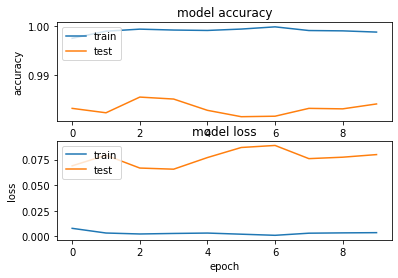

In [34]:
plt.figure(1)  
   
plt.subplot(211)  
plt.plot(history1.history['accuracy'])  
plt.plot(history1.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
   
plt.subplot(212)  
plt.plot(history1.history['loss'])  
plt.plot(history1.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

## Dataset 2

In [22]:
(X2_train, y2_train), (X2_test, y2_test) = cifar10.load_data()

In [23]:
X2_train = X2_train.reshape(X2_train.shape[0], 32, 32, 3)
X2_test = X2_test.reshape(X2_test.shape[0], 32, 32, 3)
X2_train = X2_train.astype('float32')
X2_test = X2_test.astype('float32')

In [24]:
X2_train /= 255
X2_test /= 255

In [25]:
n2_classes = 10
print("Shape before one-hot encoding: ", y2_train.shape)
Y2_train = np_utils.to_categorical(y2_train, n2_classes)
Y2_test = np_utils.to_categorical(y2_test, n2_classes)
print("Shape after one-hot encoding: ", Y2_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [27]:
classify = Sequential()
classify.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

classify.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
classify.add(MaxPool2D(pool_size=(2,2)))
classify.add(Dropout(0.25))

classify.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
classify.add(MaxPool2D(pool_size=(2,2)))
classify.add(Dropout(0.25))

classify.add(Flatten())

classify.add(Dense(500, activation='relu'))
classify.add(Dropout(0.4))
classify.add(Dense(250, activation='relu'))
classify.add(Dropout(0.3))

classify.add(Dense(10, activation='softmax'))

classify.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [35]:
classify.fit(X2_train, Y2_train, batch_size=128, epochs=10, validation_data=(X2_test, Y2_test))

Epoch 1/10
391/391 [==============================] - 310s 793ms/step - loss: 0.8187 - accuracy: 0.7139 - val_loss: 0.7677 - val_accuracy: 0.7325
Epoch 2/10
391/391 [==============================] - 296s 758ms/step - loss: 0.7384 - accuracy: 0.7423 - val_loss: 0.7176 - val_accuracy: 0.7506
Epoch 3/10
391/391 [==============================] - 291s 744ms/step - loss: 0.6727 - accuracy: 0.7659 - val_loss: 0.6958 - val_accuracy: 0.7573
Epoch 4/10
391/391 [==============================] - 303s 775ms/step - loss: 0.6176 - accuracy: 0.7827 - val_loss: 0.6663 - val_accuracy: 0.7704
Epoch 5/10
391/391 [==============================] - 304s 779ms/step - loss: 0.5674 - accuracy: 0.8002 - val_loss: 0.6548 - val_accuracy: 0.7789
Epoch 6/10
391/391 [==============================] - 306s 784ms/step - loss: 0.5285 - accuracy: 0.8136 - val_loss: 0.6434 - val_accuracy: 0.7772
Epoch 7/10
391/391 [==============================] - 301s 771ms/step - loss: 0.4875 - accuracy: 0.8282 - val_loss: 0.6643 -

In [40]:
evaluation = classify.evaluate(X2_test, Y2_test, batch_size=128, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

79/79 [==============================] - 15s 193ms/step - loss: 0.6641 - accuracy: 0.7858
Summary: Loss over the test dataset: 0.66, Accuracy: 0.79
